In [1]:
# 3.	Import the required packages with their customary aliases as follows:
#     `import pandas as pd`   
#     `import numpy as np`  
#     `import matplotlib.pyplot as plt`  
#     `import seaborn as sns`

import pandas as pd   
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns

In [2]:
# 4.	Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`.

gdp_df = pd.read_csv('../data/gdp_per_capita.csv')

In [3]:
# Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN


In [4]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
8214,Zimbabwe,1994,3965.730986,NaN
8215,Zimbabwe,1993,3634.750494,NaN
8216,Zimbabwe,1992,3649.891947,NaN
8217,Zimbabwe,1991,4126.405247,NaN
8218,Zimbabwe,1990,4013.299059,NaN


In [5]:
# 5. How many rows and columns are in `gdp_df`? What are the data types of each column?


**5.Ans: There are 8219 rows and 4 columns. The datatypes are as below: using .info()**

In [7]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8219 entries, 0 to 8218
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  8219 non-null   object 
 1   Year             8219 non-null   int64  
 2   Value            8219 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 257.0+ KB


In [8]:
gdp_df.describe()

,Year,Value,Value Footnotes
count,8219.000000,8219.000000,0.0
mean,2006.672345,20270.976242,NaN
std,9.782986,22532.004246,NaN
min,1990.000000,510.822823,NaN
25%,1998.000000,4284.868430,NaN
50%,2007.000000,11916.457927,NaN
75%,2015.000000,28543.305542,NaN
max,2023.000000,174339.077325,NaN


In [9]:
# 6. Drop the `Value Footnotes` column
gdp_df_droppeddf = gdp_df.drop('Value Footnotes', axis=1)

In [10]:
gdp_df_droppeddf.describe()

,Year,Value
count,8219.000000,8219.000000
mean,2006.672345,20270.976242
std,9.782986,22532.004246
min,1990.000000,510.822823
25%,1998.000000,4284.868430
50%,2007.000000,11916.457927
75%,2015.000000,28543.305542
max,2023.000000,174339.077325


In [11]:
gdp_df_droppeddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8219 entries, 0 to 8218
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  8219 non-null   object 
 1   Year             8219 non-null   int64  
 2   Value            8219 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 192.8+ KB


In [12]:
# Rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.
gdp_df_clean = gdp_df_droppeddf.rename(columns={"Country or Area":"Country"}) #renamed only one

In [13]:
gdp_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8219 entries, 0 to 8218
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  8219 non-null   object 
 1   Year     8219 non-null   int64  
 2   Value    8219 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 192.8+ KB


In [14]:
# Rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.-- (renaming remaining two, no change to Year column)
gdp_df_new = gdp_df_clean.rename(columns={"Value":"GDP_Per_Capita"})

In [15]:
gdp_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8219 entries, 0 to 8218
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         8219 non-null   object 
 1   Year            8219 non-null   int64  
 2   GDP_Per_Capita  8219 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 192.8+ KB


**Dataframe details:**
**gdp_df--> gdp_df_droppeddf (dropped 'Value Footnotes' column) --> gdp_df_clean (rename "Country or Area column to Country)---> gdp_df_new (renamed value column to GDP Per Capita)**

In [17]:
# 7a. How many countries have data for all years?
#gdp_df_all_years = gdp_df_new["Country"].isin(gdp_df_new["Year"("1990":"2023")])
#gdp_df_years = gdp_df_new.groupby("Country") ["Year"].agg
#gdp_df_years = gdp_df_new.pivot_table(values= "Country", index = "Year", columns ="Country", fill_value=0)
gdp_df_min_year = gdp_df_new["Year"].min()
gdp_df_min_year

1990

In [18]:
gdp_df_max_year = gdp_df_new["Year"].max()
print(gdp_df_max_year)

2023


In [19]:
gdp_df_total_years = gdp_df_max_year - gdp_df_min_year +1
gdp_df_total_years

34

In [20]:
gdp_df_country_yearcount = gdp_df_new["Country"].value_counts()
gdp_df_country_yearcount 

Country
Latvia                       34
North America                34
Mongolia                     34
Morocco                      34
Mozambique                   34
                             ..
Faroe Islands                16
Kosovo                       16
Sint Maarten (Dutch part)    15
Turks and Caicos Islands     13
Djibouti                     11
Name: count, Length: 247, dtype: int64

In [21]:
gdp_df_country_count = (gdp_df_country_yearcount == gdp_df_total_years).value_counts()
gdp_df_country_count

count
True     228
False     19
Name: count, dtype: int64

**7a. Ans: 228 countries have data for all the years and 19 countries do not have data for all the years. Total countries 247 (228 +19).**

In [23]:
# 7b. Which countries are missing many years of data?
#gdp_df_missing_yeardata = gdp_df_new["Country"].value_counts()< gdp_df_country_yearcount
#gdp_df_missing_yeardata = gdp_df_new["Country"].value_counts([(gdp_df_new["Country"].value_counts())< gdp_df_country_yearcount]) 
#gdp_df_missing_yeardata = gdp_df_new["Country"].value_counts().isin(gdp_df_country==False) 
gdp_df_missing_yeardata = gdp_df_country_yearcount[gdp_df_country_yearcount<gdp_df_total_years]
print (gdp_df_missing_yeardata)

Country
Bhutan                       33
Syrian Arab Republic         33
Somalia                      33
Tonga                        33
Lebanon                      33
Greenland                    32
West Bank and Gaza           30
Serbia                       29
Montenegro                   27
San Marino                   26
CuraÃ§ao                     24
Afghanistan                  24
Virgin Islands               21
Cayman Islands               18
Faroe Islands                16
Kosovo                       16
Sint Maarten (Dutch part)    15
Turks and Caicos Islands     13
Djibouti                     11
Name: count, dtype: int64


**7b. Ans: Countries missing data for many years: ['Bhutan', 'Syrian Arab Republic', 'Somalia', 'Tonga', 'Lebanon',
       'Greenland', 'West Bank and Gaza', 'Serbia', 'Montenegro', 'San Marino',
       'CuraÃ§ao', 'Afghanistan', 'Virgin Islands', 'Cayman Islands',
       'Faroe Islands', 'Kosovo', 'Sint Maarten (Dutch part)',
       'Turks and Caicos Islands', 'Djibouti']**

In [25]:
# 7c. Look at the number of observations per year.
#observations_per_year = gdp_df_missing_yeardata.plot(x="Year", y="Country", kind="line", marker='*') ##showing count of years for each country
#plt.legend("Country")
#plt.title("Observations_per_year")
#plt.show()

observations_per_year = gdp_df_new["Year"].value_counts() #Count of countries having data that year.
print(observations_per_year)

Year
2021    247
2020    247
2019    247
2018    247
2017    247
2016    247
2015    247
2014    247
2013    247
2012    246
2022    246
2011    246
2010    245
2009    245
2008    244
2007    242
2006    242
2005    241
2004    241
2003    241
2002    241
2000    240
2023    240
2001    240
1999    238
1998    238
1997    238
1996    236
1995    236
1994    235
1993    234
1992    234
1991    234
1990    233
Name: count, dtype: int64


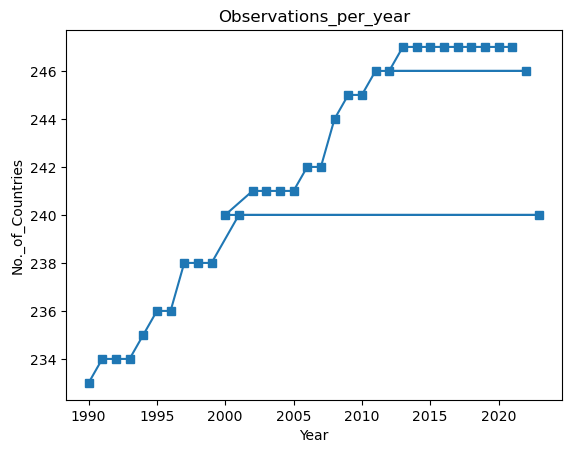

In [26]:
# 7d. What do you notice? 
observations_per_year_plot = observations_per_year.plot(x="Year", y="No_of_Observations", kind = "line", marker ='s')
plt.ylabel("No._of_Countries")
plt.title("Observations_per_year")
plt.show()

**7c,d. Ans: Observations (count of countries with data) is increasing every year.**

In [28]:
# 8a. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020.
gdp_2020 = gdp_df_new.loc[gdp_df_new["Year"]==2020]
print(gdp_2020)
gdp_2020

                          Country  Year  GDP_Per_Capita
3                     Afghanistan  2020     2769.685745
27    Africa Eastern and Southern  2020     3861.111238
61     Africa Western and Central  2020     4622.731427
95                        Albania  2020    14650.395929
129                       Algeria  2020    14194.155748
...                           ...   ...             ...
8068               Virgin Islands  2020    45055.782930
8090           West Bank and Gaza  2020     5423.682547
8120                        World  2020    18600.986362
8154                       Zambia  2020     3391.595412
8188                     Zimbabwe  2020     2987.269823

[247 rows x 3 columns]


,Country,Year,GDP_Per_Capita
3,Afghanistan,2020,2769.685745
27,Africa Eastern and Southern,2020,3861.111238
61,Africa Western and Central,2020,4622.731427
95,Albania,2020,14650.395929
129,Algeria,2020,14194.155748
...,...,...,...
8068,Virgin Islands,2020,45055.782930
8090,West Bank and Gaza,2020,5423.682547
8120,World,2020,18600.986362
8154,Zambia,2020,3391.595412


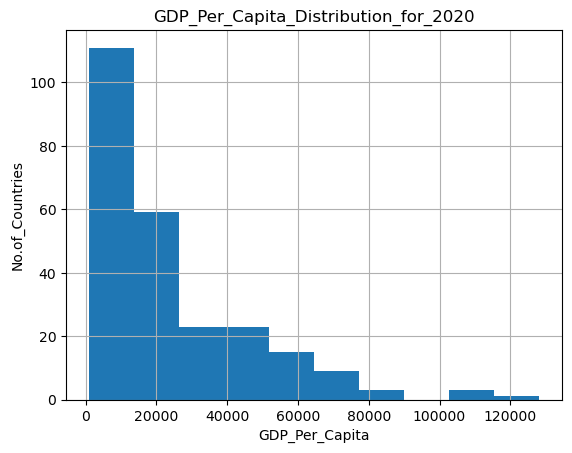

In [29]:
# 8b. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. 
# Create a histogram 
gdp_histogram = gdp_2020["GDP_Per_Capita"].hist()
plt.title("GDP_Per_Capita_Distribution_for_2020")
plt.xlabel("GDP_Per_Capita")
plt.ylabel("No.of_Countries")
plt.show()

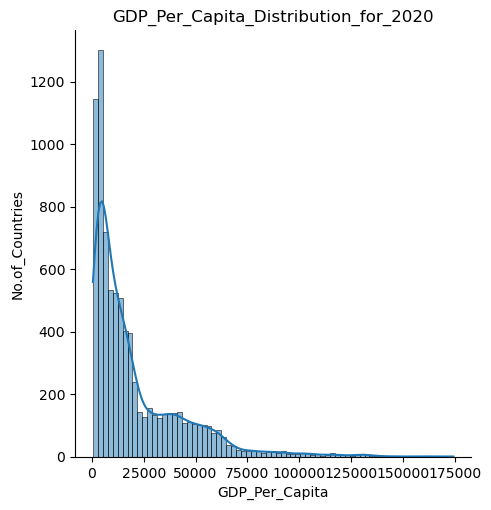

In [30]:
sns.displot(data=gdp_df_new["GDP_Per_Capita"], kde = True)
plt.title("GDP_Per_Capita_Distribution_for_2020")
plt.xlabel("GDP_Per_Capita")
plt.ylabel("No.of_Countries")
plt.show()
# Why is bar showing more than 1200, when there are 247 countries?

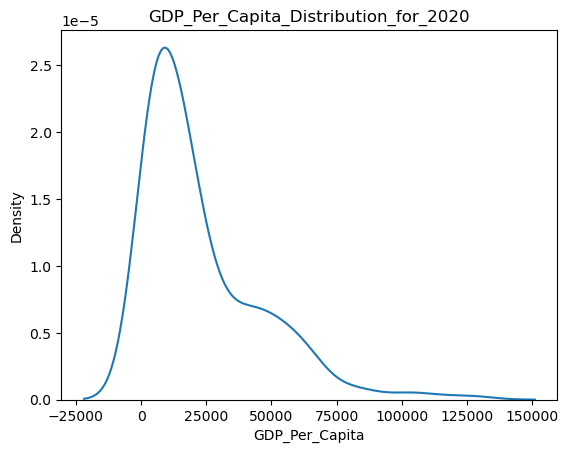

In [31]:
# 8c.  density plot
sns.kdeplot(data=gdp_2020, x='GDP_Per_Capita')
plt.title("GDP_Per_Capita_Distribution_for_2020")
plt.show()

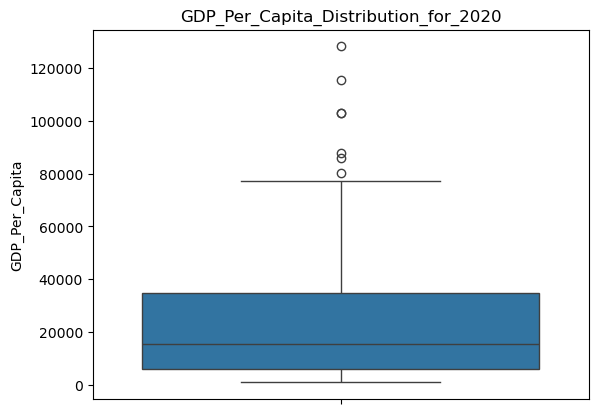

In [32]:
# 8d. boxplot
#sns.boxplot(x=gdp_2020["Country"],y=gdp_2020["GDP_Per_Capita"]) 
sns.boxplot(y=gdp_2020["GDP_Per_Capita"]) 
plt.title("GDP_Per_Capita_Distribution_for_2020")
plt.show()

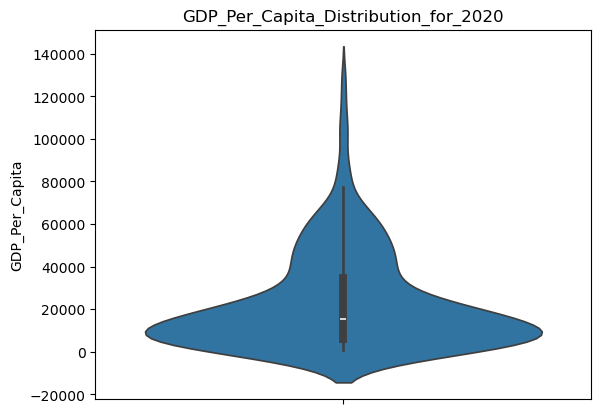

In [33]:
# 8e. violin plot
sns.violinplot(y=gdp_2020["GDP_Per_Capita"])
plt.title("GDP_Per_Capita_Distribution_for_2020")
plt.show()

**8f. What do you notice when you look at these plots?
Most countries have GDP_Per_Capita income between 0 to 40000.**


**8g. How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?
All plots shows the data is towards the lower values. 
The count of countries is represented only in Histogram.
The outliers are represented in most, however a Boxplot shows the outliers more clearly.**

In [36]:
# 9. What was the median GDP per capita value in 2020?
gdp_2020_mean = gdp_2020["GDP_Per_Capita"].mean()
print(round(gdp_2020_mean,2))
#print(gdp_2020_mean)

23044.94


In [37]:
gdp_2020_median = gdp_2020["GDP_Per_Capita"].median()
print(round(gdp_2020_median,2))

15309.24


**9. Ans: Median GDP per capita value in 2020 is 15309.23598817024**

In [81]:
# 10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. 
# Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
gdp_decades = gdp_df_new.loc[gdp_df_new["Year"].isin([1990, 2000, 2010, 2020])]
print(round(gdp_decades))


                          Country  Year  GDP_Per_Capita
3                     Afghanistan  2020          2770.0
13                    Afghanistan  2010          2849.0
23                    Afghanistan  2000          1618.0
27    Africa Eastern and Southern  2020          3861.0
37    Africa Eastern and Southern  2010          3864.0
...                           ...   ...             ...
8184                       Zambia  1990          2425.0
8188                     Zimbabwe  2020          2987.0
8198                     Zimbabwe  2010          2573.0
8208                     Zimbabwe  2000          4071.0
8218                     Zimbabwe  1990          4013.0

[965 rows x 3 columns]


In [ ]:
# 	* A boxplot
fig, ax = plt.subplots(figsize=(8,6))
boxplot = ax.boxplot(gdp_decades['GDP_Per_Capita'], patch_artist=True)
box_color = 'lightblue'
whisker_color = 'blue'
cap_color = 'gold'
flier_color = 'red'
median_color = 'red'
plt.setp(boxplot['boxes'], color=box_color)
plt.setp(boxplot['whiskers'], color=whisker_color)
plt.setp(boxplot['caps'], color=cap_color)
plt.setp(boxplot['fliers'], color=flier_color)
plt.setp(boxplot['medians'], color=median_color)
ax.set_xlabel('Year')
ax.set_ylabel('GDP_Per_Capita')
ax.set_title('GDP Per Capita for different decades')
plt.show()

**Different decades are not shown using matplotlib.**

In [ ]:
# 	boxplot using sns
sns.boxplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"])
plt.title("GDP Per Capita comparison for decades")
plt.show()

In [ ]:
# * A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
sns.barplot(x="Year", y="GDP_Per_Capita", data= gdp_decades)
plt.title("GDP Per Capita comparison for decades")
plt.show()

In [ ]:
# 	* A scatterplot
plt.scatter(gdp_decades["Year"],gdp_decades["GDP_Per_Capita"])
plt.xlabel("Year")
plt.ylabel("GDP_Per_Capita")
plt.title("GDP Per Capita comparison for decades")
plt.show()

In [ ]:
# 	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
fig, ax=plt.subplots(figsize=(8,6))
sns.regplot(
x=gdp_decades["Year"], 
y=gdp_decades["GDP_Per_Capita"],
line_kws={"color":"red", "linewidth":1.5},
ax=ax)
plt.xlabel("Year")
plt.ylabel("GDP_Per_Capita")
plt.title("GDP Per Capita comparison for decades")
plt.show()

In [ ]:
#Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

**GDP values have increased over time. Boxplot using seaborn shows values for different years, however matplotlib does not.
Barplot is easier to understand than others.
The linear representation on seaborn scatter plot is helpful in understanding that GDP values have increased for certain countries.**

In [ ]:
# 11. Which country was the first to have a GDP per capita greater than $100,000?
gdp_100k = gdp_df_new[gdp_df_new["GDP_Per_Capita"]>100000]
print(gdp_100k)

In [ ]:
gdp_100k_first_country = gdp_100k.sort_values(["Year", "Country"], ascending = [True, False])
print(gdp_100k_first_country)

**11. Ans: First country to have a GDP > $100,000 is United Arab Emirates in the year 1990 with GDP_Per_Capita of 108057.042464**

In [ ]:
# 12a. Which country had the highest GDP per capita in 2020? 
#gdp_2020_highest = gdp_2020.sort_values(["GDP_Per_Capita"], ascending = [False])
gdp_2020_highest = gdp_2020.loc[gdp_2020["GDP_Per_Capita"].idxmax(), ["GDP_Per_Capita", "Country"]]
print(gdp_2020_highest)


**12a. Ans: Luxembourg had the highest GDP per capita of 128256.560341 in 2020**

In [ ]:
# 12b. Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.
gdp_Luxembourg = gdp_df_new[gdp_df_new["Country"]=="Luxembourg"]
print(gdp_Luxembourg)

plt.plot(gdp_Luxembourg["Year"], gdp_Luxembourg["GDP_Per_Capita"])
plt.xlabel("Year")
plt.ylabel("GDP_Per_Capita")
plt.title("GDP_Per_Capita of Luxembourg from 1990-2023")
plt.show()


**12b. Ans: GDP per capita for Luxembourg kept increasing till 2007, then started to dip a little.**

In [ ]:
# 13a. Which country had the lowest GDP per capita in 2020? 
gdp_2020_lowest = gdp_2020.loc[gdp_2020["GDP_Per_Capita"].idxmin(),["GDP_Per_Capita", "Country"]]
print(gdp_2020_lowest)

**13a. Ans: Burundi had the lowest GDP per capita of 833.920257 in 2020**

In [ ]:
#13b. Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. 
gdp_Burundi = gdp_df_new[gdp_df_new["Country"]=="Burundi"]
print(gdp_Burundi)
plt.plot(gdp_Burundi["Year"], gdp_Burundi["GDP_Per_Capita"])
plt.title("GDP_Per_Capita of Burundi from 1990 to 2023")
plt.xlabel("Year")
plt.ylabel("GDP_Per_Capita")
plt.show()

**13b. Ans: GDP per Capita of Burundi dropped a lot in 1995 and since then have up and down, however, since 2015 it kept going down.**

In [ ]:
#**Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? 
#Which countries had lower GDP per capita in 2020 than in 1990?
gdp_1990 = gdp_df_new.loc[gdp_df_new["Year"]==1990]
print(gdp_1990)

In [ ]:
gdp_1990_2020 = gdp_df_new[gdp_df_new["Year"].isin([1990,2020])]\
.pivot_table(values="GDP_Per_Capita", index="Country", columns="Year",fill_value=0)
print(gdp_1990_2020)

In [ ]:
# dataframe
gdp_1990_2020_compare = pd.DataFrame({
    '1990': np.random.normal(size=1000),
    '2020': np.random.normal(loc=2, size=1000)
})    

# Fig size
plt.rcParams["figure.figsize"]=12,8

# plot histogram chart for 1990
sns.histplot(x = gdp_1990_2020[1990], stat="density", bins=20, edgecolor='black', color='blue', label="1990")

# plot histogram chart for 2020
n_bins=20

# get positions and heights of bars
heights, bins = np.histogram(gdp_1990_2020[2020], density=True, bins=n_bins)

# multiply by -1 to reverse it
heights *= -1
bin_width = np.diff(bins)[0]
bin_pos =( bins[:-1] + bin_width / 2)

# plot
plt.bar(bin_pos, heights, width=bin_width, edgecolor='black', color='red', label="2020")
plt.xlabel("GDP_Per_Capita")
plt.ylabel("Country")
plt.title("GDP_Per_Capita 1990 vs 2020")
plt.legend()
plt.show()

In [ ]:
#sorting for 1990 GDP values to present top and bottom 5 on the graph
gdp_1990_sorted = gdp_1990.sort_values(["GDP_Per_Capita"], ascending=False)
print(gdp_1990_sorted)
gdp_1990_sorted_5=pd.concat([gdp_1990_sorted[:5], gdp_1990_sorted[-5:]])
print(gdp_1990_sorted_5)

In [ ]:
#sorting for 2020 GDP values to present top and bottom 5 on the graph
gdp_2020_sorted = gdp_2020.sort_values(["GDP_Per_Capita"], ascending=False)
print(gdp_2020_sorted)
gdp_2020_sorted_5=pd.concat([gdp_2020_sorted[:5], gdp_2020_sorted[-5:]])
print(gdp_2020_sorted_5)

In [ ]:
#combining both 
gdp_1990_2020_combined = pd.concat([gdp_1990_sorted_5, gdp_2020_sorted_5])
print(gdp_1990_2020_combined)
gdp_1990_2020_pivot = gdp_1990_2020_combined.pivot(index="Country", columns="Year", values="GDP_Per_Capita")
print(gdp_1990_2020_pivot)

In [ ]:

# plot
gdp_1990_2020_pivot.plot.bar()
plt.xlabel("GDP_Per_Capita")
plt.ylabel("Country")
plt.title("GDP_Per_Capita 1990 vs 2020")
plt.xticks(fontsize=7, rotation=45)
plt.legend()
plt.show()

In [ ]:
sns.violinplot(data=gdp_1990_2020)
plt.xlabel("Year")
plt.ylabel("GDP_Per_Capita")
plt.title("GDP_Per_Capita 1990 vs 2020")
plt.show()

In [ ]:
sns.scatterplot(data=gdp_1990_2020_pivot)
plt.xlabel("Year")
plt.ylabel("GDP_Per_Capita")
plt.title("GDP_Per_Capita 1990 vs 2020")
plt.xticks(fontsize=6, rotation=60)
plt.show()

In [ ]:
sns.lineplot(data=gdp_1990_2020)
plt.xlabel("Year")
plt.ylabel("GDP_Per_Capita")
plt.title("GDP_Per_Capita 1990 vs 2020")
plt.xticks(fontsize=5, rotation=90)
plt.show()

**Yes, in general, coutries had a higher GDP per capita in 2020 than in 1990, except few.** 

In [ ]:
#Which countries had lower GDP per capita in 2020 than in 1990?
gdp_1990_2020_lower = gdp_1990_2020[gdp_1990_2020[2020] < gdp_1990_2020[1990]]
print(gdp_1990_2020_lower)

In [ ]:
# 14a. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. 
# Check the arguments for the read_csv function to find ones that can help correct the errors 
# (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) 

internet_df = pd.read_csv('../data/internet.csv', skip_blank_lines=True, nrows=6083)

In [ ]:
# 14b. Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. 


internet_df.head()

In [ ]:
internet_df.tail()

In [ ]:
#14c. Also, check the datatypes of the columns.
internet_df.info()

In [ ]:
# 15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.
internet_df_dropped = internet_df.drop('Value Footnotes',axis=1)
print(internet_df_dropped)
internet_df_clean = internet_df_dropped.rename(columns={"Country or Area" : "Country", "Value" : "Internet_Users_Pct"})
print(internet_df_clean)
internet_df_clean.info()
internet_df_clean.describe()
internet_df_clean.head()
internet_df_clean.tail()


In [ ]:
#internet_df_clean_drop_footnote = internet_df_clean.drop(["footnoteSeqID", "Footnote"],axis=1)
#internet_df_clean["Internet_Users_Pct"] = pd.to_numeric(internet_df_clean["Internet_Users_Pct"],errors="coerce")
#internet_df_clean.info()
#internet_df_clean_year = internet_df_clean["Year"].astype(int)
#print(internet_df_clean_year)

In [ ]:
# 16. Look at the number of observations in this dataset per year. What do you notice?
internet_df_observations = internet_df_clean["Year"].value_counts()
print(internet_df_observations)

**16. Ans: Year 1990 had the most observations, it decreased in 2007 and after that remained constant for few years and then kept going down.**

In [ ]:
# 17. What is the first year to have a non-zero internet users percentage value?
internet_df_non_zero = internet_df_clean[internet_df_clean["Internet_Users_Pct"] > 0].min()
print(internet_df_non_zero)

**17. Ans: The first year to have a non-zero internet users percentage value is 1990.**

In [ ]:
# 18. How does the distribution of internet users percent differ for 2000 and 2014?
internet_df_2000 = internet_df_clean[internet_df_clean["Year"]==2000]
print(internet_df_2000)

In [ ]:
internet_df_2014 = internet_df_clean[internet_df_clean["Year"]==2014]
print(internet_df_2014)

In [ ]:
internet_df_2000_2014_compare = internet_df_clean[internet_df_clean["Year"].isin([2000,2014])]\
.pivot_table(values="Internet_Users_Pct", index="Country", columns="Year", fill_value=0)
print(internet_df_2000_2014_compare)

In [ ]:
sns.violinplot(data=internet_df_2000_2014_compare)
plt.xlabel("Year")
plt.ylabel("Internet_Users_Pct")
plt.title("Internet_Users_Pct_2000 vs 2014")
plt.show()

**18. Ans: Internet_Users_Pct has increased significantly in 2014 for all the countries.**

In [ ]:
# 19. For how many countries was the percentage of internet users below 5% in 2014?
internet_df_below_5 = internet_df_clean[(internet_df_clean["Internet_Users_Pct"]<5) & (internet_df_clean["Year"]==2014)]
print(internet_df_below_5["Country"].value_counts())

In [ ]:
internet_df_below_5.describe()

**19. Ans: 10 countries had the percentage of internet users below 5% in 2014.**

In [ ]:
sns.barplot(x="Internet_Users_Pct", y="Country",data=internet_df_below_5)

In [ ]:
# 20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. 
# Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.
gdp_and_internet_use = pd.merge(gdp_df_new, internet_df_clean, on=["Country", "Year"], how="outer")
print(gdp_and_internet_use)
# gdp_df_new=8219 rows, internet_df_clean= 6083 rows

In [ ]:
# 21a. Find the three countries with the highest internet users percentage in 2014.

gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use["Year"]==2014]
print(gdp_and_internet_use_2014)

In [ ]:
# Sort "Internet_Users_Pct" to find top three
gdp_and_internet_use_2014_sorted = gdp_and_internet_use_2014.sort_values("Internet_Users_Pct", ascending=False)
print(gdp_and_internet_use_2014_sorted.head(10)) 

In [ ]:
# Top three
gdp_and_internet_use_2014_top_three = gdp_and_internet_use_2014_sorted[:3]
print(gdp_and_internet_use_2014_top_three)

**Top three countries with highest Internet Users are Iceland, Falkland (Malvinas) Islands and Bermuda.**

In [ ]:
# Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time 
# for these three countries.

gdp_and_internet_use_top_three_countries = gdp_and_internet_use[gdp_and_internet_use["Country"].isin(["Iceland", "Falkland (Malvinas) Islands", "Bermuda"])]
print(gdp_and_internet_use_top_three_countries)

In [ ]:
g = sns.FacetGrid(gdp_and_internet_use_top_three_countries, col="Country", sharey=False, ylim=(50000,150000), hue="Year")
#g.map_dataframe(sns.scatterplot,x="Year",y= "Internet_Users_Pct")
g.map_dataframe(sns.scatterplot,x="Year",y= "GDP_Per_Capita")
g.set_titles(col_template='{col_name}')

**GDP Data not available for Falkland Islands**

In [ ]:
gdp_and_internet_use_Falkland = gdp_and_internet_use[gdp_and_internet_use["Country"]== "Falkland (Malvinas) Islands"]
gdp_and_internet_use_Falkland

In [ ]:
type(g)

In [ ]:
g = sns.FacetGrid(gdp_and_internet_use_top_three_countries, col="Country", sharey=False, ylim=(0,110), hue="Year")
g.map_dataframe(sns.scatterplot,x="Year",y= "Internet_Users_Pct")
g.set_titles(col_template='{col_name}')

**21. Ans: What do you notice? For all three countries, the Users kept increasing and are more than 99 percent. For Bermuda, there was no data available till 1995, however since 1996 the count kept going up every year. Foe Falkland Island and Icelans, the data was missing for few years but kept going up since its availability.** 

In [ ]:
# 22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.

**22. Ans: Already did this while solving Q21.**

In [ ]:
gdp_and_internet_use_2014.head()

In [ ]:
gdp_and_internet_use_2014.sort_values("GDP_Per_Capita", ascending=False)

In [ ]:
# 23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. 

# sns.lineplot(x="Country", y="GDP_Per_Capita", data=gdp_and_internet_use_2014, label="GDP_Per_Capita", color="pink")
# sns.lineplot(x="Country", y="Internet_Users_Pct", data = gdp_and_internet_use_2014, label="Internet_Users_Pct", color="navy")
# plt.xlabel("Countries")
# plt.ylabel("Values")
# plt.title("GDP_Per_Capita vs Internet Users Percentage")
# plt.legend()
# plt.xticks(fontsize=7, rotation=70)
# plt.show()

# Create data
# t = np.arange(0.01, 100.0)

fig, ax1 = plt.subplots(figsize=(20,8))

color = 'tab:pink'
ax1.set_xlabel("Countries")
ax1.set_ylabel("GDP_Per_Capita", color=color)
ax1.bar(gdp_and_internet_use_2014["Country"], gdp_and_internet_use_2014["GDP_Per_Capita"], color=color, label="GDP_Per_Capita")
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(fontsize=5, rotation=90)
plt.legend()

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel("Internet_Users_Pct", color=color)  # we already handled the x-label with ax1
ax2.bar(gdp_and_internet_use_2014["Country"], gdp_and_internet_use_2014["Internet_Users_Pct"], color=color, label="Internet_Users_Pct")
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title("GDP_Per_Capita vs Internet Users Percentage in 2014")
plt.legend()
plt.show()

In [ ]:
# What do you notice from this plot? If you see any unusual points, investigate them

**Internet Users data is mostly high for the countries with lower GDP per capita . I noticed that few countries have GDP more than 160000.** 

In [ ]:
gdp_and_internet_use_2014_notice = gdp_and_internet_use_2014[gdp_and_internet_use_2014["GDP_Per_Capita"]>160000]
print(gdp_and_internet_use_2014_notice)

**Macao SAR, China has GDP_Per_capita of 162582.374111 in 2014 and no Internet users percentage. On further investigation  - It's GDP kept increasing every year since 1990 till 2013 due to tourism and also gambling is legal there and in 2020 dropped significantly due to Covid and since then it is low.**

In [ ]:
gdp_and_internet_use_MacaoSAR_China = gdp_and_internet_use[gdp_and_internet_use["Country"]=="Macao SAR, China"]
print(gdp_and_internet_use_MacaoSAR_China)

In [ ]:
# 24. **Stretch Question:** Use the `qcut` function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries 
# in `gdp_per_capita_2014` into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High".
# Put these labels in a new column, named "GDP_group".

gdp_and_internet_use_2014_classification = gdp_and_internet_use_2014.fillna(0)

pd.qcut(gdp_and_internet_use_2014_classification.GDP_Per_Capita, 3)
gdp_and_internet_use_2014_classification["GDP_group"] = pd.qcut(gdp_and_internet_use_2014_classification["GDP_Per_Capita"], 3, ["Low", "Medium", "High"])
#print(gdp_and_internet_use_2014_classification)
gdp_and_internet_use_2014_classification

In [ ]:
gdp_and_internet_use_2014_classification[gdp_and_internet_use_2014_classification["GDP_group"]=="High"]

In [ ]:
gdp_and_internet_use_2014_classification[gdp_and_internet_use_2014_classification["GDP_group"]=="Medium"]

In [ ]:
gdp_and_internet_use_2014_classification[gdp_and_internet_use_2014_classification["GDP_group"]=="Low"]

In [ ]:
# 25. **Stretch Question:** How does the median internet users percentage compare for the three gdp groups?
gdp_and_internet_use_internet_median = gdp_and_internet_use_2014["Internet_Users_Pct"].median()
gdp_and_internet_use_internet_median

In [ ]:
gdp_and_internet_use_internet_median_each_group = gdp_and_internet_use_2014_classification.groupby("GDP_group")["Internet_Users_Pct"].median()
gdp_and_internet_use_internet_median_each_group

In [ ]:
#gdp_and_internet_use_2014_classification["GDP_group"].hist(figsize=(12,8))
gdp_and_internet_use_internet_median_each_group.plot.bar()
plt.ylabel("Internet_Users_Pct_Median")
plt.title("Internet_Users_Pct_Median for GDP group")
plt.legend()
plt.show()

In [ ]:
# ### Bonus exercise:
# 1.    Download another data set from the UN data (http://data.un.org/Explorer.aspx) to merge with your data and explore.

gdp_assets_liabilities = pd.read_csv('../data/UNdata_Export.csv')
gdp_assets_liabilities.info()

In [ ]:
# Rename the column
gdp_assets_liabilities_clean = gdp_assets_liabilities.rename(columns={"Country or Area" : "Country"})
gdp_assets_liabilities_clean

In [ ]:
# Correct capitalization of Country names

gdp_assets_liabilities_clean["Country"] = gdp_assets_liabilities_clean["Country"].str.capitalize()
gdp_assets_liabilities_clean

In [ ]:
gdp_internet_assets_liabilities = pd.merge(gdp_and_internet_use, gdp_assets_liabilities_clean, on=["Country","Year"], how="outer")
gdp_internet_assets_liabilities.info()

In [ ]:
gdp_assets_liabilities_clean

In [ ]:
# checking data for 1 country after merge

gdp_internet_assets_liabilities[gdp_internet_assets_liabilities["Country"]=="Zimbabwe"].head(10)

In [ ]:
# checking data of the country in the original data set(before merge)

gdp_and_internet_use[gdp_and_internet_use["Country"]=="Zimbabwe"].head(20)

In [ ]:

gdp_internet_assets_liabilities_sorted = gdp_internet_assets_liabilities.sort_values("Value", ascending=False)
print(gdp_internet_assets_liabilities_sorted)

In [ ]:
gdp_internet_assets_liabilities_sorted_Italy = gdp_internet_assets_liabilities_sorted[gdp_internet_assets_liabilities_sorted["Country"]=="Italy"]
gdp_internet_assets_liabilities_sorted_Italy

In [ ]:
df=gdp_internet_assets_liabilities_sorted_Italy
fig, ax1 = plt.subplots(figsize=(20,8))
ax2= ax1.twinx()
ax1.bar(df["Year"]-0.2, df["GDP_Per_Capita"], color="pink", label= "GDP_Per_Capita")
plt.legend()
ax2.bar(df["Year"] +0.2, df["Value"], color="blue", label= "Value")
plt.legend()
plt.show()

In [ ]:
# 0.	Read in continents.csv and merge with the existing DataFrame
continents_df = pd.read_csv('../data/continents.csv', delimiter=',', doublequote=True)

In [ ]:


# 1.	Let's compare the median gdp per capita for each across all of the years of data that we have. Perform a groupby on both Year and Continent and then aggregate using the median and save the results to a new object.  
# a. What type of object results from this?  
# b. Look at the index of the resulting object. What do you notice about it?  
# c. Use .loc to select the median gdp for Asia in 2010.  
# d. Use .loc to select the median gdp for both Asia and Africa in 2010.  
# e. Use .loc to select the values for all continents for the year 2010.  
# f. Use .loc to select the median gdp for Asia across all years. Hint: One way to do this is to use the swaplevel method.
# 2.	Group gdp by both Year and Continent and find the min, median, and max values for both gdp per capita and internet use. Hint: You may want to use the agg method.  
# a. Look at the columns of the resulting object. What do you notice?  
# b. Select the median gdp per capita value for Asia in 2010.
# 3.	In this question, we'll see how the median gdp per capita has changed over time. Start by creating a Series, gdp_median_per_year by grouping by the Year variable and calculating the median gdp per capita.  
# a. Convert gdp_median_per_year to a DataFrame by using the reset_index method.  
# b. The shift method will allow you to compare values across rows. Use this method to create a new column showing the change in gdp per capita since the prior year.  
# c. How many times was there a drop in median gdp per capita from one year to the next?
# 4.	Now, let's expand on the prior question to find the change in GDP from year to year for each country.  
# a. Add a new column to the gdp_and_internet_use DataFrame showing the change in gdp per capita from the prior year for that country. Hint: You can combine groupby with the shift method.  
# b. Which country had the largest one year increase in gdp per capita? Which had the largest one year drop in gdp per capita?
# 5.	When looking at time series data, there can often be a large amount of observation to observation variability, making it more difficult to see general trends. This variability can be smoothed out by calculating rolling averages. We'll see how in this question.  
# a. First, filter gdp_and_internet_use down to just the rows for the United States and save the result to a DataFrame named gdp_internet_us.  
# b. Use rolling to calculate the 3-year moving average of gdp per capita for the US.  
# c. Plot both the original gdp per capita values and the rolling average on the same plot.
# 6.	When working with large datasets, it can sometimes pay off to be mindful of what data types you are using for each variable.  
# a. Create a new column, Continent_Category by converting the Continent column to a category.  
# b. Use the memory_usage method to compare the memory used by the original Continent column compared to the category version.  
# c. You can also sometimes get speedups for groupby operations by using category datatypes. In Jupyter, if you want to estimate how long it takes to run a block of code, you can add the %%timeit magic to the top of a cell. Compare doing a groupby + aggregation on the original Continent column compared to the Continent_Category column.  
# d. You can also sometimes save memory usage by adjusting the size that is stored for integer values. By default, the int64 type is used which can store values between –9223372036854775808 and 9223372036854775807. However, for the Year variable, we really don't need that large of a range. We could get by with a 16 bit integer, whose range is -32768 to 32768. Convert the Year column to int16 type and then compare the memory usage.  
# e. Finally, you don't have to make these datatype changes after the data has been read in. Add some parameters to the read_csv call that imports the GDP data. Read in only the needed columns (not the Value Footnotes column). Also, read in the Country or Area column as a category type and the Year column as an int16 type.